In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go


In [33]:
dataframe  = pd.read_csv("Future_sales_predictions.csv")
dataframe.head(7)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8


In [5]:
missing_values = dataframe.isnull().sum()
missing_values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
dataframe.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
dataframe.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
def boxplot(dataframe):
    for column  in dataframe.columns:
        plt.figure(figsize=(3, 3))
        dataframe[[column]].boxplot()
        plt.title(f"Boxplot for {column}")
        plt.show()

In [34]:


def boxplot(dataframe):
    num_columns = len(dataframe.columns)
    fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 5))

    for i, column in enumerate(dataframe.columns):
        dataframe[[column]].boxplot(ax=axes[i])
        axes[i].set_title(f"Boxplot for {column}")
        
    plt.show()


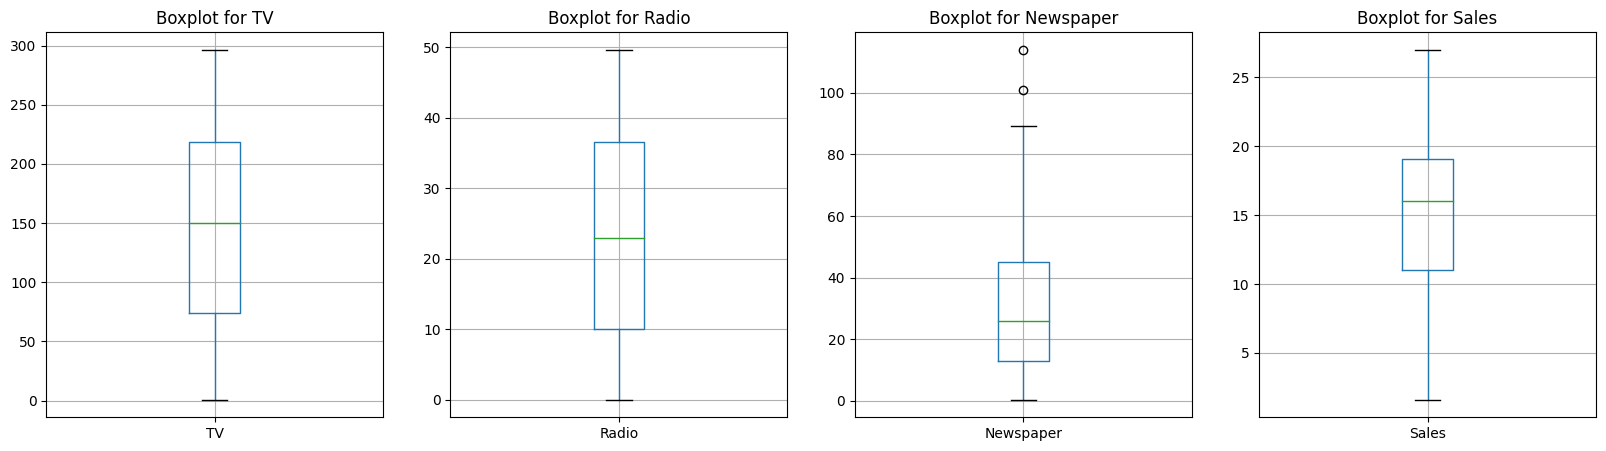

In [35]:
boxplot(dataframe)

In [36]:
def removing_outliers(dataframe):
    for i in dataframe.columns:
        
        q1 = dataframe[i].quantile(0.25)
        q3 = dataframe[i].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5*iqr
        upper_limit = q3 + 1.5*iqr
        dataframe[i]   = np.where(dataframe[i]>upper_limit,upper_limit,dataframe[i])
        dataframe[i]   = np.where(dataframe[i]<lower_limit,lower_limit,dataframe[i])

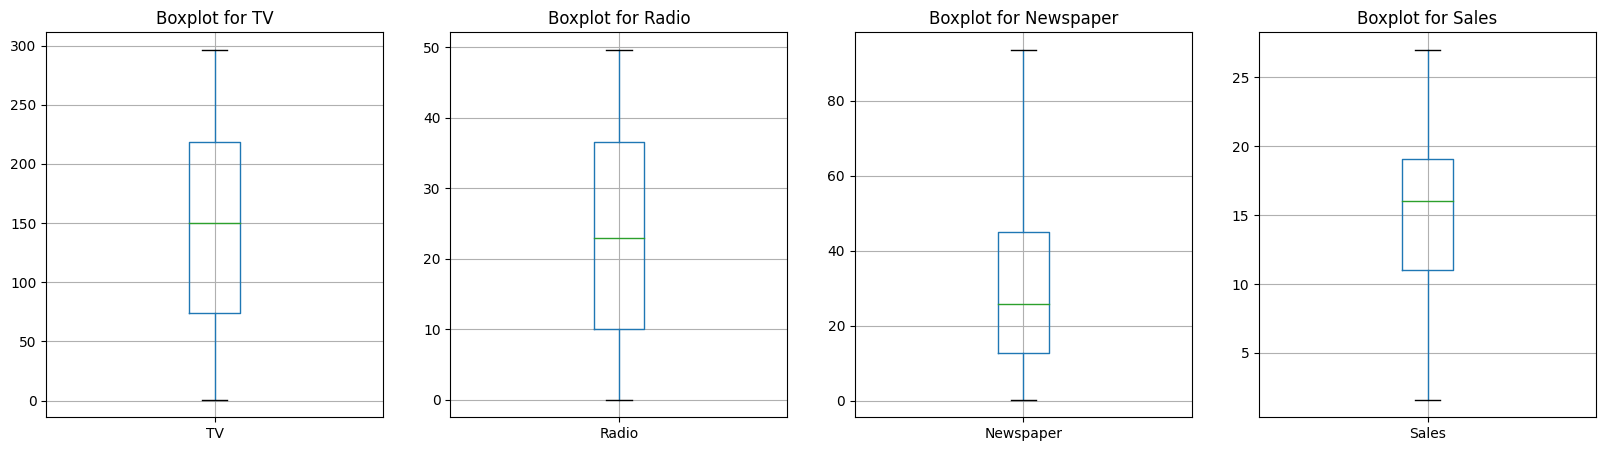

In [37]:
removing_outliers(dataframe)
boxplot(dataframe)

### visualize the relationship between the amount spent on advertising on TV and units sold:

In [49]:
figure = px.scatter(dataframe, x="Sales", y="TV", size="TV", trendline="ols")
figure.show()


#### relationship between the amount spent on advertising on newspapers and units sold:


In [51]:



figure = px.scatter(dataframe, x="Sales",y="Newspaper", size="Newspaper", trendline="ols")
figure.show()

`let’s have a look at the correlation of all the columns with the sales column:`

In [44]:
correlation = dataframe.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.160959
Name: Sales, dtype: float64


## Future Sales Prediction Model
`I will train a machine learning model to predict the future sales of a product. But before I train the model, let’s split the data into training and test sets:`

In [53]:
x = np.array(dataframe.drop(["Sales"], axis= 1))
y = np.array(dataframe["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
                                                
                                  

let’s train the model to predict future sales:

In [54]:
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9058046015102617


In [55]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

[21.37913096]
